## CSYE 7370 Assignment 3 - Deep Learning with CNNs OR RNNs
### Jiachi Sun

In this assignment, I choose the topic: Deep Learning with RNNs. In the jupyternotebook, I chose 10 different language models corresponding to 10 questions. All models are from Hugging Face. Each model first shows the code necessary to run the model and the tests used to analyze the model performance, followed by an analysis of some theory or implementation methods of the model, and finally an analysis of the performance.

In [1]:
! pip install transformers

     ---------------------------------------- 5.5/5.5 MB 14.6 MB/s eta 0:00:00
     -------------------------------------- 151.6/151.6 kB 4.6 MB/s eta 0:00:00
     -------------------------------------- 163.5/163.5 kB 4.9 MB/s eta 0:00:00
     -------------------------------------- 267.8/267.8 kB 8.3 MB/s eta 0:00:00
     ---------------------------------------- 3.3/3.3 MB 19.1 MB/s eta 0:00:00


### Fill-Mask (10 Points)
##### Run a Fill-Mask language model. Explain the theory behind your model, and run it.  Analyze how well you think it worked.

In [5]:
from transformers import pipeline
unmasker = pipeline('fill-mask', model='bert-base-uncased')
unmasker("Messi is an [MASK] footballer.")

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


[{'score': 0.15649151802062988,
  'token': 6811,
  'token_str': 'egyptian',
  'sequence': 'messi is an egyptian footballer.'},
 {'score': 0.11666731536388397,
  'token': 16953,
  'token_str': 'algerian',
  'sequence': 'messi is an algerian footballer.'},
 {'score': 0.1122114434838295,
  'token': 9408,
  'token_str': 'albanian',
  'sequence': 'messi is an albanian footballer.'},
 {'score': 0.08587213605642319,
  'token': 3059,
  'token_str': 'italian',
  'sequence': 'messi is an italian footballer.'},
 {'score': 0.0752883031964302,
  'token': 8511,
  'token_str': 'argentine',
  'sequence': 'messi is an argentine footballer.'}]

In [6]:
unmasker("Messi is an [MASK] footballer who helped Argentina win the Copa America.")

[{'score': 0.9845007658004761,
  'token': 8511,
  'token_str': 'argentine',
  'sequence': 'messi is an argentine footballer who helped argentina win the copa america.'},
 {'score': 0.0042662047781050205,
  'token': 3059,
  'token_str': 'italian',
  'sequence': 'messi is an italian footballer who helped argentina win the copa america.'},
 {'score': 0.0032621901482343674,
  'token': 23464,
  'token_str': 'uruguayan',
  'sequence': 'messi is an uruguayan footballer who helped argentina win the copa america.'},
 {'score': 0.0031226391438394785,
  'token': 2248,
  'token_str': 'international',
  'sequence': 'messi is an international footballer who helped argentina win the copa america.'},
 {'score': 0.0012723173713311553,
  'token': 5619,
  'token_str': 'argentina',
  'sequence': 'messi is an argentina footballer who helped argentina win the copa america.'}]

The model-BERT base model is a pretrained model on English language using a masked language modeling (MLM) objective. Masked language modeling is a process of masking tokens in a sequence with a masking token and training the model to fill that mask with the correct token. The dataset used to pretrained the BERT model is BookCorpus, which contain 11038 unpubliched books and English Wikipedia.  
Each sentence's masking procedure:
1. 15% of the tokens are masked.
2. In 80% of the cases, the masked tokens are replaced by [MASK].
3. In 10% of the cases, the masked tokens are replaced by a random token (different) from the one they replace.
4. In the 10% remaining cases, the masked tokens are left as is.  

The model was trained for one million steps with a batch size of 256 on four cloud TPUs configured as pods (a total of 16 TPU chips). For 90% of the steps, the sequence length was restricted to 128 tokens, and for the remaining 10%, to 512 tokens. The optimizer used is Adam with a learning rate of 1e-4, β1=0.9 and β2=0.999, a weight decay of 0.01, learning rate warmup for 10,000 steps and linear decay of the learning rate after.  

##### Analyze Performance
From the results of filling the above two sentences. In the absence of sufficient contextual information, the performance of the model is relatively average, and no single word has obtained a high score. But in the case where we provided the context, the model gave a very high score for 'argentine', reaching 0.98. It is worth mentioning that the model gave plausible words based on the 'an' we used, even when no context was given. So I think the model is performing very well.

### Question Answering (10 Points)
##### Run a Question Answering language model. Explain the theory behind your model, and run it.  Analyze how well you think it worked.

In [9]:
from transformers import pipeline

nlp = pipeline("question-answering")

context = r"""
At the age of 19 years and 259 days, Musiala became the youngest player to make 100 appearances for the German giants when he featured in the Bundesliga clash against Schalke on Saturday.
"""

print(nlp(question="Who is the youngest player to make 100 appearances?", context=context))
print(nlp(question="Musiala became the youngest player to make 100 appearances for the German giants against which team?", context=context))
print(nlp(question="Musiala became the youngest player to make 100 appearances for the German giants at what age?", context=context))

No model was supplied, defaulted to distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


{'score': 0.9994397163391113, 'start': 38, 'end': 45, 'answer': 'Musiala'}
{'score': 0.879644513130188, 'start': 168, 'end': 175, 'answer': 'Schalke'}
{'score': 0.9333576560020447, 'start': 15, 'end': 17, 'answer': '19'}


Finding a response from a text after being asked a question is known as extractive question answering. The SQuAD dataset, which is solely based on that job, serves as an illustration of a question-answering dataset.
The extractive question-answering procedure:
1. Create a model and a tokenizer from the checkpoint name. The weights from the checkpoint are loaded into the model, which is recognized as a BERT model.

2. Define a text and a few questions.

3. Create a tokenizer and a model from the checkpoint name. The weights from the checkpoint are loaded into the model, which is recognized as a BERT model.

4. Pass this sequence through the model. This generates a range of scores for both the start and end positions for each of the question and text sequence tokens.

5. Compute the softmax of the result to get probabilities over the tokens

6. Fetch the tokens from the identified start and stop values, convert those tokens to a string.

7. Print the results

##### Analyze Performance
The model is able to give high-scoring correct answers to the questions we are given. And the answers have high marks. Even if we post the subject or there is some other text between the answer and the subject of the text, the model can give the answer, so I think the model is doing great.  
At the same time, it should also be said that when the irrelevant length between the answer and the subject of the question is too long, the score of the answer will also be affected. For example, the first question gave a score of 99%, which was reduced to 87% in the second question, a drop of 12%.

### Summarization (10 Points)
##### Run a Summarization language model. Explain the theory behind your model, and run it.  Analyze how well you think it worked.

In [13]:
from transformers import pipeline

summarizer = pipeline("summarization", model="facebook/bart-large-cnn")
ARTICLE = """ BBC News - Caught in a diplomatic limbo, Mehran Karimi Nasseri made a small area of Roissy Charles de Gaulle airport his home in 1988.
His experience inspired the 2004 film, The Terminal, starring Tom Hanks.
Mr Nasseri was eventually given the right to live in France, but he ended up returning to the airport a few weeks ago, where he died of natural causes, an airport official told AFP.
Born in 1945 in the Iranian province of Khuzestan, Mr Nasseri first flew to Europe in search of his mother.
He spent some years living in Belgium, having been expelled from countries including the UK, the Netherlands and Germany for not having the correct immigration documents.
He then went to France, where he made the airport's 2F Terminal his home.
Nestled on his bench surrounded by trolleys containing the possessions he had accumulated, he spent his days writing about his life in a notebook and reading books and newspapers.
His story attracted international media attention and caught the eye of Stephen Spielberg, who directed The Terminal, starring Hanks and Catherine Zeta-Jones.
After the film's release, journalists flocked to speak with the man who had inspired a Hollywood movie. 
At one point, Mr Nazzeri, who called himself "Sir Alfred," was giving up to six interviews a day, Le Parisien reports.
Despite being granted refugee status and the right to remain in France in 1999, he stayed at the airport until 2006, when he was taken to hospital to be treated for an illness.
He then spent time living in a hostel using the money he had received for the film, French newspaper Libération reports.
Mr Nasseri returned to the airport a few weeks ago, where he lived until he died, an airport official said.
He was found with several thousands euros in his possession, the official added.
"""
print(summarizer(ARTICLE, max_length=200, min_length=100, do_sample=False))
print(summarizer(ARTICLE, max_length=150, min_length=30, do_sample=False))
print(summarizer(ARTICLE, max_length=20, min_length=10, do_sample=False))
print(summarizer(ARTICLE, max_length=10, min_length=5, do_sample=False))

[{'summary_text': 'Mehran Nasseri was born in 1945 in the Iranian province of Khuzestan. He was expelled from several countries for not having the correct documents. His story inspired the 2004 film, The Terminal, starring Tom Hanks. He died of natural causes a few weeks ago, an airport official said. He had several thousands of euros in his possession, the official added. He spent his days writing in a notebook and reading books and newspapers. He also spent time in hospital, where he was treated for illness.'}]
[{'summary_text': 'Mehran Nasseri was born in 1945 in the Iranian province of Khuzestan. He was expelled from several countries for not having the correct documents. His story inspired the 2004 film, The Terminal, starring Tom Hanks.'}]
[{'summary_text': 'Mehran Nasseri was born in 1945 in Khuzestan, Iran.'}]
[{'summary_text': 'Mehran Nasseri was born'}]


According to the text we give, and specify the longest and shortest number of characters in the output text. The model will generate a textual summary for us. The BART model is pre-trained in English and fine-tuned according to CNN Daily Mail. BART is a transformer encoder-encoder (seq2seq) model with a bidirectional (BERT-like) encoder and an autoregressive (GPT-like) decoder. BART is pre-trained by corrupting text with an arbitrary noising function, and learning a model to reconstruct the original text.

##### Analyze Performance
When the word limit is small, the text output by the model is satisfactory. However, it can be seen that when the length of the output text is gradually limited, the longitude and center point of the summary are increasingly unable to correctly summarize the central information that the article seeks to express. Sometimes, it will not even be able to output a complete sentence. So overall, I don't think the model's performance is satisfactory, especially when we want to summarize it in one or two sentences.

### Text Classification (10 Points)
##### Run a Text Classification language model. Explain the theory behind your model, and run it.  Analyze how well you think it worked.

In [3]:
from transformers import pipeline
classifier = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base", return_all_scores=True)
classifier("I am sorry to hear that.")

[[{'label': 'anger', 'score': 0.0018442420987412333},
  {'label': 'disgust', 'score': 0.01388921681791544},
  {'label': 'fear', 'score': 0.005337886046618223},
  {'label': 'joy', 'score': 0.0015181611524894834},
  {'label': 'neutral', 'score': 0.02108500339090824},
  {'label': 'sadness', 'score': 0.9477745890617371},
  {'label': 'surprise', 'score': 0.008550981059670448}]]

In [7]:
classifier("Sorry, but it's really funny.")

[[{'label': 'anger', 'score': 0.005547282285988331},
  {'label': 'disgust', 'score': 0.010237766429781914},
  {'label': 'fear', 'score': 0.003320804564282298},
  {'label': 'joy', 'score': 0.7731170654296875},
  {'label': 'neutral', 'score': 0.04823915287852287},
  {'label': 'sadness', 'score': 0.03782330080866814},
  {'label': 'surprise', 'score': 0.12171456217765808}]]

In [8]:
classifier("I really didn't expect you to come, thank you.")

[[{'label': 'anger', 'score': 0.014175974763929844},
  {'label': 'disgust', 'score': 0.0013075220631435513},
  {'label': 'fear', 'score': 0.004389127250760794},
  {'label': 'joy', 'score': 0.0287084449082613},
  {'label': 'neutral', 'score': 0.029354888945817947},
  {'label': 'sadness', 'score': 0.0027102744206786156},
  {'label': 'surprise', 'score': 0.9193537831306458}]]

This model can be used to categorize emotions in English text data. Anger, disgust, fear, joy, neutral, sadness, and surprise are among the six basic emotions predicted by the model, which was trained using six different datasets (see Appendix below).  
A balanced subset of the aforementioned datasets are used to train the model (2,811 observations per emotion, i.e., nearly 20k observations in total). This balanced subset is divided into two parts: training and evaluation. In comparison to a baseline of 1/7 random chance, the evaluation accuracy is 66%.

##### Analyze Performance
I think the model performs very well, whether we test it with words with a strong emotional tone, or with sentences with inflection points. The models were able to give weights and ratings estimates for six different emotions based on our sentences. And they are all in line with the emotions that the text wants to express.

### Text Generation (10 Points)
##### Run a <Text Generation> language model. Explain the theory behind your model, and run it.  Analyze how well you think it worked.

In [12]:
from transformers import pipeline, set_seed
generator = pipeline('text-generation', model='gpt2')
set_seed(42)
generator("Welcome to China,", max_length=50, num_return_sequences=6)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': "Welcome to China, Japan and the Pacific. In just a couple of weeks Japan's economy has begun to grow, China is ready for the kind of growth and confidence required for a more stable, prosperous China. More than 20 percent of economists expect China"},
 {'generated_text': "Welcome to China, which has seen a recent rise in global economic growth following a sharp drop in the country's value of gold prices.\n\nChina was the second-biggest market of investors in Q3 2014, with more than 8.5"},
 {'generated_text': "Welcome to China, where more and more people are spending as little as a dollar a month and don't have access to all their Internet, while in the United States, Internet users are at nearly seven times their purchasing power. They are going through some"},
 {'generated_text': 'Welcome to China, a destination once ruled by emperor Huang, and a place where he came face to face with a formidable horde of monsters known as the Fuhai. But with the help of his army 

In [15]:
generator("CSYE 7370 is a good course,", max_length=50, num_return_sequences=6)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'CSYE 7370 is a good course, so there are many possibilities for you to complete. However, it is not suitable for most classes.\n\nCourse information\n\nThis is a free course on the German Language. As part of this,'},
 {'generated_text': 'CSYE 7370 is a good course, but there is still plenty of material to learn, especially in dealing with the subject matter. I will also suggest that you go to the website of your choice for a complete list of topics. As this topic'},
 {'generated_text': "CSYE 7370 is a good course, but it's only a 2 course. The course itself is very simple.\n\nCITES: 6 courses, 6 lessons, 3 of which will be shown in Part 5 of Part III.\n"},
 {'generated_text': "CSYE 7370 is a good course, but you should use it anyway! I'm talking only about 3.5 hours. My review: http://scholarreviews.co\n\n2\n\n3\n\n( 2 Reviews)\n"},
 {'generated_text': "CSYE 7370 is a good course, which I highly recommend looking through. You'll be amazed at how difficult it can b

The GPT-2 Text Generation model was self-supervised pretrained on a sizable corpus of English data. This indicates that it was pretrained using simply the raw texts, with no human labeling of any kind (thus, it can use a lot of material that is readily accessible to the public), and an automatic procedure to generate inputs and labels from those texts. Specifically, it was taught to predict the following word in sentences.  
Targets are the same sequence as inputs, but with one token (word or fragment of text) moved to the right. More specifically, inputs are sequences of continuous text of a specific length. To ensure that the forecasts for the token I only take into account inputs from 1 to I and not future tokens, the model internally employs a mask-mechanism.  
In this manner, the model develops an internal representation of the English language from which elements helpful for subsequent tasks can be extracted. But when it comes to producing messages in response to a cue, the model excels at what it was trained for.  
The OpenAI team sought to train this model on as big of a corpus as they could. They used scraping software to collect all the web pages from Reddit outbound links with at least three karma in order to create it. The model was not trained on any portion of Wikipedia; note that all Wikipedia pages were eliminated from this dataset. The resulting dataset, known as WebText, has 40GB of texts but hasn't been made available to the general public.

##### Analyze Performance
It can be seen that the first sentence generated at the beginning often has a strong correlation and continuity with the text we give, but as more and more texts are generated, the correlation becomes lower and lower. Sentence-to-sentence relevance is also decreasing. At the same time, sometimes the sentences are not very smooth. At the same time, it should be said that the performance of the model improves when we give enough and enough detailed nouns.  
To sum up, I feel that the performance of the text generation model is not good enough.

### Text2Text Generation (10 Points)
##### Run a Text2Text language model. Explain the theory behind your model, and run it.  Analyze how well you think it worked.

In [22]:
from transformers import AutoModelWithLMHead, AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("mrm8488/t5-base-finetuned-question-generation-ap")
model = AutoModelWithLMHead.from_pretrained("mrm8488/t5-base-finetuned-question-generation-ap")

def get_question(answer, context, max_length=64):
  input_text = "answer: %s  context: %s </s>" % (answer, context)
  features = tokenizer([input_text], return_tensors='pt')

  output = model.generate(input_ids=features['input_ids'], 
               attention_mask=features['attention_mask'],
               max_length=max_length)

  return tokenizer.decode(output[0])

context = "At the age of 19 years and 259 days, Musiala became the youngest player to make 100 appearances for the German giants when he featured in the Bundesliga clash against Schalke on Saturday."
answer = "Musiala"

get_question(answer, context)

The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.
The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.
The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.
The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.


'<pad> question: Who was the youngest player to make 100 appearances for the German giants?</s>'

In [23]:
answer = "19"

get_question(answer, context)

"<pad> question: What was Musiala's age?</s>"

In [24]:
answer = "Schalke"

get_question(answer, context)

'<pad> question: Who did Musiala play against in the Bundesliga?</s>'

The model is bas on the T5-Model which is base on the transfer learning.  
Transfer learning, where a model is first pre-trained on a data-rich task before being fine-tuned on a downstream task, has emerged as a powerful technique in natural language processing (NLP). The effectiveness of transfer learning has given rise to a diversity of approaches, methodology, and practice. Transfer learning explore the landscape of transfer learning techniques for NLP by introducing a unified framework that converts every language problem into a text-to-text format. Our systematic study compares pre-training objectives, architectures, unlabeled datasets, transfer approaches, and other factors on dozens of language understanding tasks.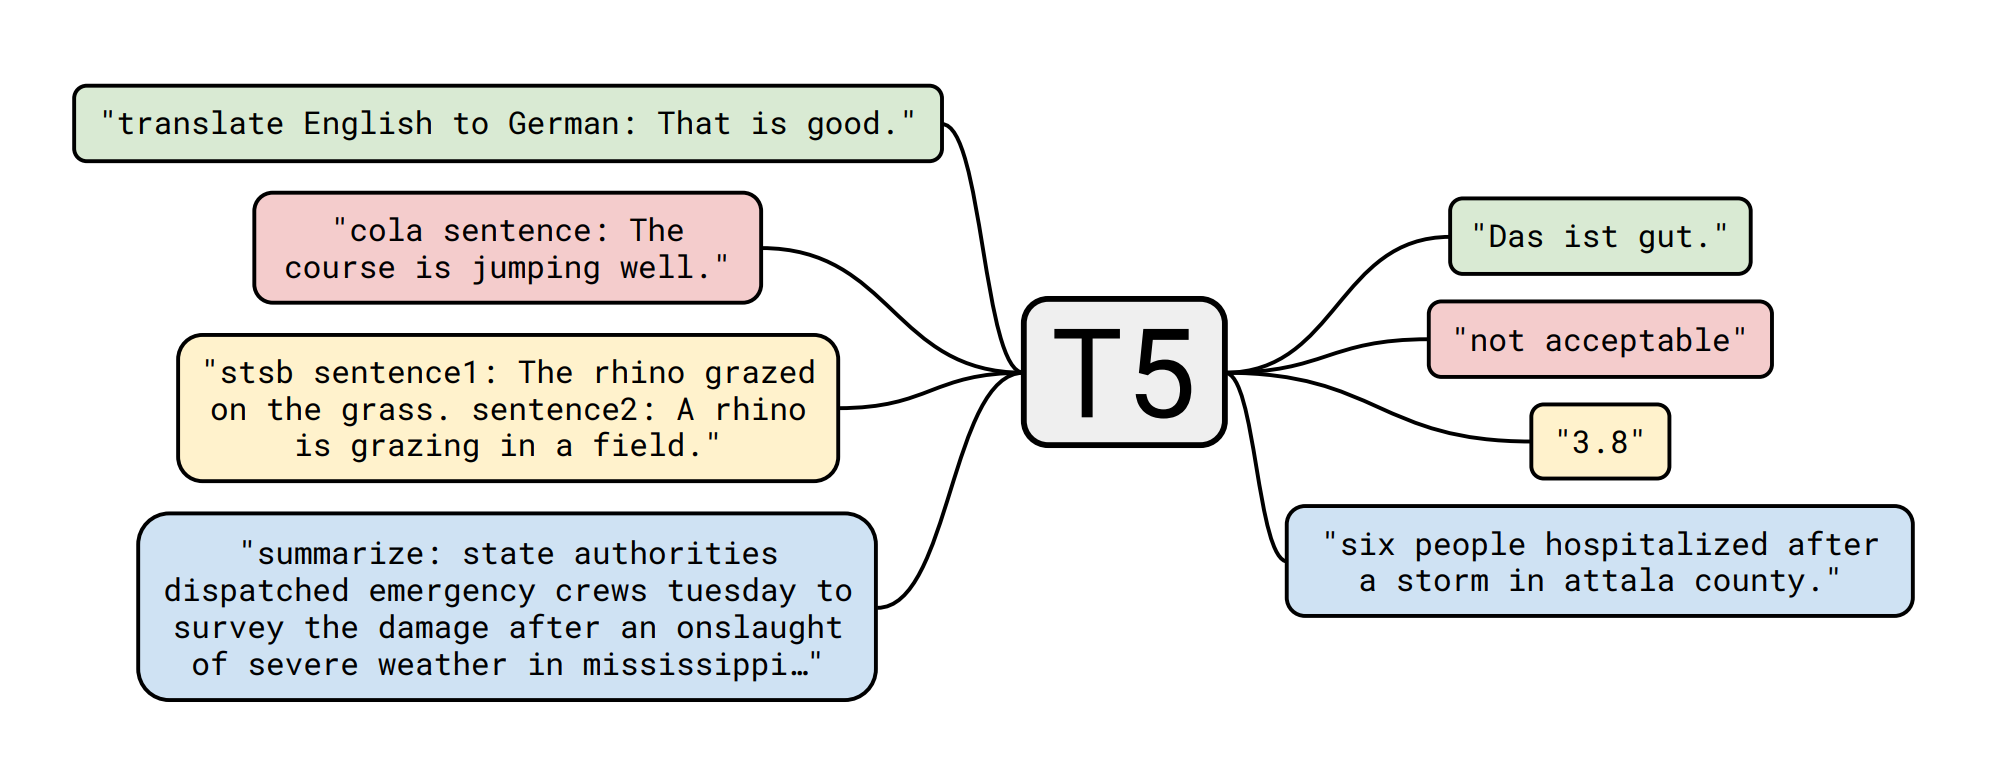

##### Analyze Performance
This model performs very well. First, based on the answers we gave, the models all successfully generated reasonable questions. At the same time, even if the answer to the question is far away from the main part of the question, the model still gives the correct answer.  
But it should also be said that on the question of the age of 19, the answer given by the model is not ideal, and there is no mention of the important attribute that he is the youngest German to achieve this achievement. However, the text generated by the model is still reasonable. Overall, the model performed well.

### Token Classification (10 Points)
##### Run a Token Classification language model. Explain the theory behind your model, and run it.  Analyze how well you think it worked.

In [8]:
from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import pipeline

tokenizer = AutoTokenizer.from_pretrained("dslim/bert-base-NER")
model = AutoModelForTokenClassification.from_pretrained("dslim/bert-base-NER")

nlp = pipeline("ner", model=model, tokenizer=tokenizer)

content = "I am Zhangsan and I am from China and I currently live in Boston."
nlp(content)

[{'entity': 'B-PER',
  'score': 0.97082776,
  'index': 3,
  'word': 'Zhang',
  'start': 5,
  'end': 10},
 {'entity': 'I-PER',
  'score': 0.73965347,
  'index': 4,
  'word': '##san',
  'start': 10,
  'end': 13},
 {'entity': 'B-LOC',
  'score': 0.99984837,
  'index': 10,
  'word': 'China',
  'start': 28,
  'end': 33},
 {'entity': 'B-LOC',
  'score': 0.9989178,
  'index': 16,
  'word': 'Boston',
  'start': 58,
  'end': 64}]

In [9]:
content = "I am Zhang San and I am from China and I currently live in Boston."
nlp(content)

[{'entity': 'B-PER',
  'score': 0.9978713,
  'index': 3,
  'word': 'Zhang',
  'start': 5,
  'end': 10},
 {'entity': 'I-PER',
  'score': 0.99777645,
  'index': 4,
  'word': 'San',
  'start': 11,
  'end': 14},
 {'entity': 'B-LOC',
  'score': 0.99984944,
  'index': 10,
  'word': 'China',
  'start': 29,
  'end': 34},
 {'entity': 'B-LOC',
  'score': 0.99877673,
  'index': 16,
  'word': 'Boston',
  'start': 59,
  'end': 65}]

In [10]:
content = "I am Zhang san and I am from China and I currently live in Boston."
nlp(content)

[{'entity': 'B-PER',
  'score': 0.9864915,
  'index': 3,
  'word': 'Zhang',
  'start': 5,
  'end': 10},
 {'entity': 'I-PER',
  'score': 0.7261156,
  'index': 4,
  'word': 'sa',
  'start': 11,
  'end': 13},
 {'entity': 'B-LOC',
  'score': 0.9998466,
  'index': 11,
  'word': 'China',
  'start': 29,
  'end': 34},
 {'entity': 'B-LOC',
  'score': 0.9987545,
  'index': 17,
  'word': 'Boston',
  'start': 59,
  'end': 65}]

The bert-base-NER model has been optimized for Named Entity Recognition and is ready for deployment. It performs at the cutting edge level for the NER problem. Four categories of entities have been taught to it: location, organizations, people, and Miscellaneous.  
Also, The standard CoNLL-2003 Named Entity Recognition dataset in English was used to fine-tune this model.   

| Abbreviation | Description |
| :- | :- |
| O | Outside of a named entity |
| B-MIS |Beginning of a miscellaneous entity right after another miscellaneous entity |
| I-MIS |Miscellaneous entity |
| B-PER |Beginning of a person’s name right after another person’s name |
| I-PER |Person’s name |
| B-ORG |Beginning of an organization right after another organization |
| I-ORG |organization |
| B-LOC |Beginning of a location right after another location |
| I-LOC |Location |  

When there are two entities of the same kind that are back-to-back, the training dataset makes a distinction between the beginning and continuation of each item so that the model can determine where the second entity starts. 

##### Analyze Performance
The performance of the model is very good, and it can distinguish names and places. At the same time, the second part of the name can also be recognized. And the recognition of the place is also very successful. But one thing to note is that when we modified the second paragraph of the name to lowercase, there was a problem in the model's recognition. But after all the name we should start with a capital. So we still have to say that the performance of the model is very good.

### Translation (10 Points)
##### Run a Translation language model. Explain the theory behind your model, and run it.  Analyze how well you think it worked.

In [14]:
from transformers import T5Tokenizer, T5ForConditionalGeneration
tokenizer = T5Tokenizer.from_pretrained("t5-small")
model = T5ForConditionalGeneration.from_pretrained("t5-small")

input_ids = tokenizer("translate English to German: we are who we are.", return_tensors="pt").input_ids
outputs = model.generate(input_ids)
print(tokenizer.decode(outputs[0], skip_special_tokens=True))

Wir sind, wer wir sind.


In [20]:
input_ids = tokenizer("translate English to German: I am Zhangsan and I come from China, currently live in Boston.", return_tensors="pt").input_ids
outputs = model.generate(input_ids)
print(tokenizer.decode(outputs[0], skip_special_tokens=True))

Ich bin Zhangsan und ich komme aus China, wohne derzeit in Boston.


In [22]:
input_ids = tokenizer("translate English to French: I am Zhangsan and I come from China.", return_tensors="pt").input_ids
outputs = model.generate(input_ids)
print(tokenizer.decode(outputs[0], skip_special_tokens=True))

Je suis Zhangsan et je viens de Chine.


The T5-small model can be used for text translation. According to different options, it can translate English into French, German, Indian, etc.  
T5 transforms all NLP issues into a text-to-text format using an encoder-decoder paradigm. It is instructed by instructor coercion. This means that we always need an input sequence and an associated target sequence for training. The model receives the input sequence via input ids. The target sequence is provided to the decoder using the decoder input ids after being prepended by a start-sequence token and moved to the right. The EOS token is subsequently attached to the target sequence in teacher-forcing fashion, which correlates to the labels. The start-sequence token here is the PAD token. Both supervised and unsupervised methods of training and fine-tuning T5 are possible.  
Also, this model is base on the trassfer learning. Transfer learning, which involves pre-training a model on a task with lots of data before fine-tuning it on a subsequent task, has become a potent method for natural language processing (NLP). The success of transfer learning has led to a wide range of methodologies, practices, and strategies.

##### Analyze Performance
The performance of the model is very good, no matter which language it is translated into, the model can give the correct answer. And there are no grammar problems. The generation speed is also very fast.

### Zero-Shot Classification (10 Points)
##### Run a Zero-Shot language model. Explain the theory behind your model, and run it.  Analyze how well you think it worked.

In [2]:
from transformers import pipeline
classifier = pipeline("zero-shot-classification",model = "facebook/bart-large-mnli")
sequence_to_classify = "I'm trying to make a roast chicken."
candidate_labels = ['cooking', 'dancing', 'exploring']
classifier(sequence_to_classify, candidate_labels)

{'sequence': "I'm trying to make a roast chicken.",
 'labels': ['cooking', 'exploring', 'dancing'],
 'scores': [0.9771406650543213, 0.02184891700744629, 0.0010104364482685924]}

In [3]:
sequence_to_classify = "I'm trying to make a roast chicken."
candidate_labels = ['learning', 'cooking', 'dancing', 'exploring']
classifier(sequence_to_classify, candidate_labels)

{'sequence': "I'm trying to make a roast chicken.",
 'labels': ['cooking', 'learning', 'exploring', 'dancing'],
 'scores': [0.8891574144363403,
  0.0900416225194931,
  0.019881604239344597,
  0.0009194551385007799]}

In [4]:
sequence_to_classify = """Last week I upgraded my iOS version and ever since then my phone has been overheating whenever I use your app."""
candidate_labels = ['mobile', 'website', 'billing', 'account access']
classifier(sequence_to_classify, candidate_labels)

{'sequence': 'Last week I upgraded my iOS version and ever since then my phone has been overheating whenever I use your app.',
 'labels': ['mobile', 'account access', 'billing', 'website'],
 'scores': [0.9600788354873657,
  0.016832033172249794,
  0.014393892139196396,
  0.008695204742252827]}

In their strategy, Yin et al. suggested employing pre-trained NLI models as pre-built zero-shot sequenceclassifiers. The approach involves posing the sequence to be categorized as the NLI, then creating ahypothesis from each possible label. For instance, we could create the hypothesis This book is about politics ifwe wanted to determine whether a sequence belongs to the class "politics." Then, label probabilities arecreated from the entailment and contradiction probabilities.  
In many situations, this approach is remarkably effective, especially when used to more powerful pre-trainedmodels like BART and Roberta. View the code snippets below for examples of utilizing this model for zero-shotclassification both with Hugging Face's built-in pipeline and with native Transformers/PyTorch code. For a morethorough introduction to this and other zero shot approaches, check this blog article.

##### Analyze Performance
As can be seen from three different test results, the model performs very well. In the first test, it can be found that even if the cook tag is not mentioned, the model still gives a good judgment and black out 97% of the scores. The keyword learn was added to the second test. I think that trying to cook is also a kind of learning, so the test model can also give the same answer. It was concluded that the model successfully identified, but only about 10% of the correlations were considered. In the third test, we tested more complex sentences and labels, and the model also gave the correct labels, so I think the performance of the program is very good.

### Sentence Similarity (10 Points)
##### Run a Sentence Similarity language model. Explain the theory behind your model, and run it.  Analyze how well you think it worked.

In [5]:
! pip install -U sentence-transformers

In [7]:
from sentence_transformers import SentenceTransformer, util
model = SentenceTransformer('all-MiniLM-L6-v2')

sentences = ['Damien want to play God Of War 5.',
          'Damien is playing God Of War 5.',
          'Damien want to play Hollow Knight.',
          'The World Cup is comming.',
          'Tom is playing Hoolw Knight.',
          'I bought the God Of War 5 and Hollow Knight.',
          'Tom want to play God Of War 5 today.',
          'Jack want to play football.',
          'Today is monday.',
          'God of War released yesterday. '
          ]

#Encode all sentences
embeddings = model.encode(sentences)

#Compute cosine similarity between all pairs
cos_sim = util.cos_sim(embeddings, embeddings)

#Add all pairs to a list with their cosine similarity score
all_sentence_combinations = []
for i in range(len(cos_sim)-1):
    for j in range(i+1, len(cos_sim)):
        all_sentence_combinations.append([cos_sim[i][j], i, j])

#Sort list by the highest cosine similarity score
all_sentence_combinations = sorted(all_sentence_combinations, key=lambda x: x[0], reverse=True)

print("Top-5 most similar pairs:")
for score, i, j in all_sentence_combinations[0:5]:
    print("{} \t {} \t {:.4f}".format(sentences[i], sentences[j], cos_sim[i][j]))

Top-5 most similar pairs:
Damien want to play God Of War 5. 	 Damien is playing God Of War 5. 	 0.9336
Damien want to play God Of War 5. 	 Tom want to play God Of War 5 today. 	 0.7793
Damien is playing God Of War 5. 	 Tom want to play God Of War 5 today. 	 0.7060
Damien want to play God Of War 5. 	 Damien want to play Hollow Knight. 	 0.6852
Tom want to play God Of War 5 today. 	 God of War released yesterday.  	 0.6271


The model all-MiniLM-L6-v2 can be used to determine how high the similarity between sentences is. For purposes such as clustering or semantic search, it maps sentences and paragraphs to a 384 dimensional dense vector space.  
Using a self-supervised contrastive learning objective, the project's goal is to train sentence embedding models on very large sentence level datasets. Development Team tuned in on a 1B sentence pairs dataset using the pretrained nreimers/MiniLM-L6-H384-uncased model. The development team used a contrastive learning objective: given a sentence from the pair, the model should be able to identify which of a group of randomly picked other sentences was actually matched with it in our dataset.  
The development team had nreimers/MiniLM-L6-H384-uncased model at the time of pre-training. During Fine-tuning using a contrastive objective. The development team compute the cosine similarity from each possible sentence pairs from the batch. And also apply the cross entropy loss by comparing with true pairs.  
For the hyper parameters: On a TPU v3-8, the development team trained our model. The model is trained by the development team over 100k steps with a batch size of 1024. (128 per TPU core). The learning rate warm-up used by the development team is 500. The maximum length of the sequence was 128 tokens. The AdamW optimizer with a 2e-5 learning rate was employed by the development team.

##### Analyze Performance
The ability of the model is to find the most similar 5 pairs of sentences from the few sentences we give. From the first pair of data, we can see that when the subject and object of the two sentences have a high degree of repetition, the model gives an evaluation of 93%, which is very high. From the second and third sets of data, it can be seen that when the subject is different, the score will drop significantly. From the fourth set of data, it can be seen that when the objects are longer and different, the score will further decrease. The last set of data we found that the object largely determines the similarity of the two models. Overall, I think the model does a great job, not only by comparing the similarity of the strings, but also by taking into account the location and tense of the subject-verb-object.

### Reference:
1. BERT base model (uncased) https://huggingface.co/bert-base-uncased?text=The+goal+of+life+is+%5BMASK%5D.
2. Extractive Question Answering https://huggingface.co/transformers/v2.6.0/usage.html#extractive-question-answering
3. BART (large-sized model), fine-tuned on CNN Daily Mail https://huggingface.co/facebook/bart-large-cnn?text=The+tower+is+324+metres+%281%2C063+ft%29+tall%2C+about+the+same+height+as+an+81-storey+building%2C+and+the+tallest+structure+in+Paris.+Its+base+is+square%2C+measuring+125+metres+%28410+ft%29+on+each+side.+During+its+construction%2C+the+Eiffel+Tower+surpassed+the+Washington+Monument+to+become+the+tallest+man-made+structure+in+the+world%2C+a+title+it+held+for+41+years+until+the+Chrysler+Building+in+New+York+City+was+finished+in+1930.+It+was+the+first+structure+to+reach+a+height+of+300+metres.+Due+to+the+addition+of+a+broadcasting+aerial+at+the+top+of+the+tower+in+1957%2C+it+is+now+taller+than+the+Chrysler+Building+by+5.2+metres+%2817+ft%29.+Excluding+transmitters%2C+the+Eiffel+Tower+is+the+second+tallest+free-standing+structure+in+France+after+the+Millau+Viaduct.
4. Jochen Hartmann, "Emotion English DistilRoBERTa-base". https://huggingface.co/j-hartmann/emotion-english-distilroberta-base/, 2022.
5. GPT-2 https://huggingface.co/gpt2?text=My+name+is+Thomas+and+my+main
6. mrm8488/t5-base-finetuned-question-generation-ap: https://huggingface.co/mrm8488/t5-base-finetuned-question-generation-ap?text=answer%3A+Manuel+context%3A+Manuel+has+created+RuPERTa-base+with+the+support+of+HF-Transformers+and+Google
7. bert-base-NER https://huggingface.co/dslim/bert-base-NER?text=My+name+is+Clara+and+I+live+in+Berkeley%2C+California.
8. T5 https://huggingface.co/docs/transformers/model_doc/t5
9. facebook/bart-large-mnli https://huggingface.co/facebook/bart-large-mnli?candidateLabels=space+%26+cosmos%2C+scientific+discovery%2C+microbiology%2C+robots%2C+archeology&multiClass=false&text=A+new+model+offers+an+explanation+for+how+the+Galilean+satellites+formed+around+the+solar+system%E2%80%99s+largest+world.+Konstantin+Batygin+did+not+set+out+to+solve+one+of+the+solar+system%E2%80%99s+most+puzzling+mysteries+when+he+went+for+a+run+up+a+hill+in+Nice%2C+France.+Dr.+Batygin%2C+a+Caltech+researcher%2C+best+known+for+his+contributions+to+the+search+for+the+solar+system%E2%80%99s+missing+%E2%80%9CPlanet+Nine%2C%E2%80%9D+spotted+a+beer+bottle.+At+a+steep%2C+20+degree+grade%2C+he+wondered+why+it+wasn%E2%80%99t+rolling+down+the+hill.+He+realized+there+was+a+breeze+at+his+back+holding+the+bottle+in+place.+Then+he+had+a+thought+that+would+only+pop+into+the+mind+of+a+theoretical+astrophysicist%3A+%E2%80%9COh%21+This+is+how+Europa+formed.%E2%80%9D+Europa+is+one+of+Jupiter%E2%80%99s+four+large+Galilean+moons.+And+in+a+paper+published+Monday+in+the+Astrophysical+Journal%2C+Dr.+Batygin+and+a+co-author%2C+Alessandro+Morbidelli%2C+a+planetary+scientist+at+the+C%C3%B4te+d%E2%80%99Azur+Observatory+in+France%2C+present+a+theory+explaining+how+some+moons+form+around+gas+giants+like+Jupiter+and+Saturn%2C+suggesting+that+millimeter-sized+grains+of+hail+produced+during+the+solar+system%E2%80%99s+formation+became+trapped+around+these+massive+worlds%2C+taking+shape+one+at+a+time+into+the+potentially+habitable+moons+we+know+today.
10. all-MiniLM-L6-v2 https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2

### License
MIT License

Copyright (c) 2022 Jiachi Sun

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.